In [124]:
import pandas as pd

import os

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF

from IPython.display import clear_output

import community
from community import community_louvain
from collections import Counter
from networkx.algorithms.community import k_clique_communities

import math



In [125]:
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig('analysis/negative/{}.png'.format(fig_id), format='png', dpi=300)

In [126]:
df_metrics_values_rows=[]

In [127]:
df_giant_metrics_values_rows=[]

In [128]:
#importo il grafo completo
first_graph = nx.read_gpickle('data/graphs/negative/negative_graph.gpickle')

# Prime misure generali
## Numero di nodi e link

In [129]:
n_nodes = first_graph.number_of_nodes()
n_links = first_graph.number_of_edges()
print("Number of nodes:\t{}".format(n_nodes))
print("Number of links:\t{}".format(n_links))
df_metrics_values_rows.append(('Number of nodes',n_nodes))
df_metrics_values_rows.append(('Number of links',n_links))

Number of nodes:	10577
Number of links:	70191


## Grado medio e densità

In [130]:
degrees_dict = dict(first_graph.degree()).values()
degrees_list = list(degrees_dict)
avg_degree = np.mean(degrees_list)
density = nx.density(first_graph)
print('Average degree:\t{}'.format(avg_degree))
print('Density:\t{}'.format(density))
df_metrics_values_rows.append(('Average degree',avg_degree))
df_metrics_values_rows.append(('Density',density))

Average degree:	13.272383473574738
Density:	0.0012549530515861137


# Analisi della distribuzione del grado

In [131]:
std_dev =np.std(degrees_list)
median = np.median(degrees_list)
minimum=np.min(degrees_list)
maximum=np.max(degrees_list)
print("Average degree:\t\t{}".format(avg_degree))
print('Standard deviation:\t{}'.format(std_dev))
print('Median:\t\t\t{}'.format(median))
print('Minimum:\t\t{}'.format(minimum))
print('Maximum:\t\t{}'.format(maximum))
df_metrics_values_rows.append(('Degree standard deviation',std_dev))
df_metrics_values_rows.append(('Median degree',median))
df_metrics_values_rows.append(('Minimum degree',minimum))
df_metrics_values_rows.append(('Maximum degree',maximum))

Average degree:		13.272383473574738
Standard deviation:	22.21068180483157
Median:			0.0
Minimum:		0
Maximum:		213


## ECDF - loglog scale

Saving figure ecdf
Saving figure eccdf


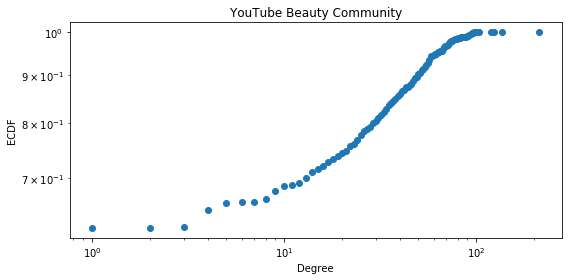

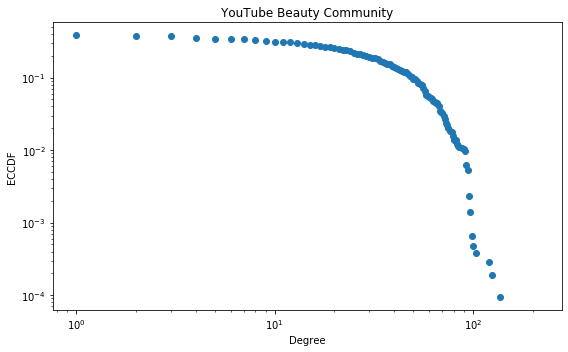

In [132]:
ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)

y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_ylabel('ECDF')
axes.set_xlabel('Degree')
plt.title('YouTube Beauty Community')

save_fig('ecdf')

y = 1-ecdf(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community')

save_fig('eccdf')

## Confronto con rete equivalente E-R

In [133]:
p = density

### Faccio la media di più reti random

In [134]:
er_avgs = []
er_stds = []
er_medians = []
er_mins = []
er_maxs = []

In [135]:
for i in range(10):
    print('{}/10'.format(i))
    clear_output(wait=True)
    random_graph = nx.fast_gnp_random_graph(n_nodes,p)
    er_degrees_dict = dict(random_graph.degree()).values()
    er_degrees_list = list(er_degrees_dict)
    er_avgs.append(np.mean(er_degrees_list))
    er_stds.append(np.std(er_degrees_list))
    er_medians.append(np.median(er_degrees_list))
    er_mins.append(np.min(er_degrees_list))
    er_maxs.append(np.max(er_degrees_list))

9/10


In [136]:
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()

pd_rows=[]

er_avg_degree = np.mean(er_avgs)
er_density = nx.density(random_graph)
er_std_dev = np.mean(er_stds)
er_median = np.mean(er_medians)
er_minimum = np.mean(er_mins)
er_maximum = np.mean(er_maxs)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df_real_er_comparison = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
df_real_er_comparison.to_csv('analysis/negative/df_real_er_comparison.csv')
print('NETWORKS COMPARISON')
print(df_real_er_comparison)

NETWORKS COMPARISON
                 Metric name  Real network  Random network
0            Number of nodes  10577.000000    10577.000000
1            Number of links  70191.000000    70335.000000
2                    Density      0.001255        0.001258
3             Average degree     13.272383       13.260868
4  Degree standard deviation     22.210682        3.636439
5              Median degree      0.000000       13.000000
6             Minimum degree      0.000000        2.200000
7             Maximum degree    213.000000       28.700000


                 Metric name  Real network  Random network
0            Number of nodes  10577.000000    10577.000000
1            Number of links  70191.000000    70156.000000
2                    Density      0.001255        0.001254
3             Average degree     13.272383       13.265765
4  Degree standard deviation     22.210682        3.617057
5              Median degree      0.000000       13.000000
6             Minimum degree      0.000000        2.000000
7             Maximum degree    213.000000       27.000000
Saving figure YouTube Beauty Community vs Erdos-Renyi


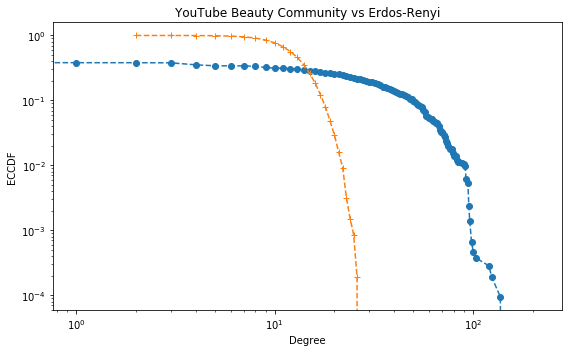

In [137]:
pd_rows=[]

random_graph = nx.fast_gnp_random_graph(n_nodes,p)
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()
er_degrees_dict = dict(random_graph.degree()).values()
er_degrees_list = list(er_degrees_dict)
er_avg_degree = np.mean(er_degrees_list)
er_density = nx.density(random_graph)
er_std_dev = np.std(er_degrees_list)
er_median = np.median(er_degrees_list)
er_minimum = np.min(er_degrees_list)
er_maximum = np.max(er_degrees_list)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
df.to_csv('analysis/negative/df_real_er_comparison_one.csv')
print(df)

ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)
y = 1-ecdf(x)
er_ecdf = ECDF(er_degrees_list)
er_x = np.unique(er_degrees_list)
er_y = 1-er_ecdf(er_x)

fig_ecdf_youtube = plt.figure(figsize=(8,5))
axes = fig_ecdf_youtube.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='--')
axes.loglog(er_x,er_y,marker = '+', ms = 6, linestyle='--')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community vs Erdos-Renyi')

save_fig('YouTube Beauty Community vs Erdos-Renyi')

# Hubs

In [138]:
percentile_99 = np.percentile(degrees_list,99)
percentile_95 = np.percentile(degrees_list,95)
print("Percentile 99:{}".format(percentile_99))
print("Percentile 95:{}".format(percentile_95))
df_metrics_values_rows.append(('Percentile 99',percentile_99))

Percentile 99:91.0
Percentile 95:63.0


In [139]:
hub_nodi = [k for k,v in dict(first_graph.degree()).items() if v>= percentile_99]
print(hub_nodi)
df_metrics_values_rows.append(('Number of hubs',len(hub_nodi)))

['Nancy Rodriguez', 'Her Majesty THE Queen', 'Caroline Dougherty', 'Samantha Gambill', 'Siera Wright', 'Alex Green', 'Amalia Rincon', 'Samantha March', 'Shawny Boo', 'Meera McNeely', 'Aurelia Carter', 'yendrica nunez', 'Madison East', 'Bianca Renteria', 'i’m cool but anyways as i was saying', 'Kari-Anne Vrooman', 'Malaika Elien', 'Rodasia Batiste', 'Jenny•', 'Rebecca Bedaysie', 'Phia E', 'Jamica Jay', 'Jamie Munson', 'Amanda', 'Nicole Smith', 'Alaina Richardson', 'Sabrina-chan Nightcore and lyrics', 'Aly Montalvo', 'Melanie LaBlanc-Mann', 'Lily Caple', 'Monica Lomax', 'Henric Capiña', 'WhiteRabbitTricks', 'Alexandra Hatlelid', 'golden.s', 'Masuda Akter', 'kylie samuels', 'Cupcake Creativity', 'Zinnia Hardy', 'Junior', 'Leelou Iehl', 'itzmaggy', 'TX Ginger', 'Dainy Jose', 'Noura jk', 'Mel sue', 'AaronP11', 'Tim', 'Rol fems', 'pracheta arya', 'Angel b', 'dancediva310', 'Diane S', 'Dawson Carpenter', 'KurlyKy !', 'Andrea Carpenter', 'Elisey Girl', 'Briana Rios', 'p a e c h', 'Tinisha Aust

In [140]:
np.save('analysis/negative/hubs.npy',hub_nodi)

# Isolates

In [141]:
isolates = list(nx.isolates(first_graph))
print(isolates)
np.save('analysis/negative/isolates.npy',isolates)
df_metrics_values_rows.append(('Number of isolates',len(isolates)))

['Jodes G', 'Sonnett Chevans', 'Kat', 'Laura and Adam', 'Allison R', 'Melcah Nacionales', 'CPFN', 'Ketsen Boy', 'Stephanie Helzer', 'Arielle Brittany', 'Rita Holmes', 'Amber Rhinehart', 'Enimsaj Htby', 'Ayesha Fountain', 'Marli Marlirni', 'Bidiya K Damian', 'Madiha Fatima', 'Hattie Simpson', 'S. A', 'T awnya', 'AJ_Zidare', 'Sky W Edits', 'Paula Bearss', 'Deena', 'Amar Hamdan', 'Liliana Arellano', 'Bailee Rincon', 'CupRcake Bmor', 'Antonia Thomas', 'Nickey&Anthony niles', 'Mia Gillespie', 'María Cabrera', 'Nina Bina', 'Kittyface7 Kat', 'Joseph Homanick', 'Jess Wd', 'lea', 'Eli Alva', 'Hannah P', 'Kimberly Myhill', 'Jouline Svanfeldt', 'Veareny Villanueva', 'Mary O’Brien', 'MsSuperTrue', 'Love Dove', 'Lupe Martinez', 'esha varma', 'Galia Lori', 'Lini xo', 'Aleena Khan', 'Ashley DeSouza', 'Paola Ojeda', 'Cristin Turner', 'Maddison Linn', 'Sarah Foshee', 'Emmjoy7', 'Annette Faith Morton', 'monika tobing', 'Nucie Nuce', 'garnerjv', 'Sunem Patino', 'Yen L', 'RedLadyBug U', 'Divaglitz Lifesty

# Connettività

In [142]:
print("The network is {}.".format("connected" if nx.is_connected(first_graph) else "not connected"))
n_components = nx.number_connected_components(first_graph)
print("There are {} components.".format(n_components))
df_metrics_values_rows.append(('Number of connected components',n_components))

The network is not connected.
There are 6589 components.


In [143]:
connected_components = []
for component in nx.connected_components(first_graph):
    connected_components.append(component)
np.save('analysis/negative/connected_components.npy',connected_components)

## Studio della giant component

In [144]:
giant_component = max([(first_graph.subgraph(c).copy(),first_graph.subgraph(c).copy().order()) for c in nx.connected_components(first_graph)],key = lambda x:x[1])
giant_component=giant_component[0]

In [145]:
giant_degrees_dict = dict(giant_component.degree()).values()
giant_degrees_list = list(giant_degrees_dict)
giant_density = nx.density(giant_component)
giant_avg_degree = np.mean(giant_degrees_list)
giant_std_dev =np.std(giant_degrees_list)
giant_median = np.median(giant_degrees_list)
giant_minimum=np.min(giant_degrees_list)
giant_maximum=np.max(giant_degrees_list)
df_giant_metrics_values_rows.append(('Average degree',giant_avg_degree))
df_giant_metrics_values_rows.append(('Density',giant_density))
df_giant_metrics_values_rows.append(('Degree standard deviation',giant_std_dev))
df_giant_metrics_values_rows.append(('Median degree',giant_median))
df_giant_metrics_values_rows.append(('Minimum degree',giant_minimum))
df_giant_metrics_values_rows.append(('Maximum degree',giant_maximum))
print("Average degree:\t\t{}".format(giant_avg_degree))
print('Density:\t\t{}'.format(giant_density))
print('Standard deviation:\t{}'.format(giant_std_dev))
print('Median:\t\t\t{}'.format(giant_median))
print('Minimum:\t\t{}'.format(giant_minimum))
print('Maximum:\t\t{}'.format(giant_maximum))

Average degree:		36.27627118644068
Density:		0.010250429835106155
Standard deviation:	22.955556463231893
Median:			33.0
Minimum:		1
Maximum:		213


## Distribuzione della size delle componenti connesse

Saving figure Connected component size distribution


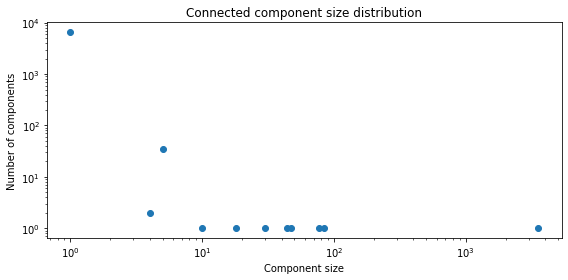

In [146]:
x = np.unique([len(c) for c in connected_components])

y = []
counter=0
for sz in x:
    for c in connected_components:
        if len(c) == sz:
            counter+=1
    y.append(counter)
    counter = 0
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Component size')
axes.set_ylabel('Number of components')
plt.title('Connected component size distribution')

save_fig('Connected component size distribution')

# Transitività

In [147]:
avg_clustering_coeff = nx.average_clustering(first_graph)
df_metrics_values_rows.append(('Average local clustering coefficient',avg_clustering_coeff))

In [148]:
transitivity = nx.transitivity(first_graph)
df_metrics_values_rows.append(("Transitivity (global clustering)",transitivity))

In [149]:
clustering=nx.clustering(first_graph)
np.save('analysis/negative/clustering.npy',clustering)

In [150]:
print('Transitivity (global clustering):{}'.format(transitivity))
print('Average local clustering coefficient:{}'.format(avg_clustering_coeff))
print('Local clustering:{}'.format(clustering))

Transitivity (global clustering):0.7299778347948768
Average local clustering coefficient:0.27487761475898276
Local clustering:{'Narelys Negron': 0.6013071895424836, '도연Doyeon': 0.5645161290322581, 'Alexa Levidi': 0.6634146341463415, 'Jodes G': 0, 'Anni Duky': 0.7792207792207793, 'Sonnett Chevans': 0, 'Kat': 0, 'Laura and Adam': 0, 'Allison R': 0, 'Melcah Nacionales': 0, 'l e x i m o n t y': 0.48484848484848486, 'Nancy Rodriguez': 0.3683707596751075, 'Jenny Jen1010': 1.0, 'CPFN': 0, "DIzzyY's MSD": 0.5966312056737588, 'Stephanie Shaffer': 1.0, 'Ketsen Boy': 0, 'Stephanie Helzer': 0, 'SamGal1624': 0.6691176470588235, 'Arielle Brittany': 0, 'Rita Holmes': 0, 'Amber Rhinehart': 0, 'Enimsaj Htby': 0, 'Tasha22Bella': 1.0, 'Ayesha Fountain': 0, 'Marli Marlirni': 0, 'Kobe Pina': 0.9243589743589744, 'Kitty Keylee': 1.0, 'Bidiya K Damian': 0, 'Cathy Bynum': 1.0, 'Her Majesty THE Queen': 0.5710077845571219, 'Madiha Fatima': 0, 'Katie Moore': 0.6773618538324421, 'Mari 81': 0.8823529411764706, 'Hat

In [151]:
local_clustering_dev_std = np.std(list(clustering.values()))
local_clustering_min = np.min(list(clustering.values()))
local_clustering_max = np.max(list(clustering.values()))
local_clustering_mean = np.mean(list(clustering.values()))
local_clustering_median = np.median(list(clustering.values()))
df_metrics_values_rows.append(("Average local clustering (mediated)",local_clustering_mean))
df_metrics_values_rows.append(("Local clustering standard deviation (mediated)",local_clustering_dev_std))
df_metrics_values_rows.append(("Median local clustering (mediated)",local_clustering_median))
df_metrics_values_rows.append(("Minimum local clustering (mediated)",local_clustering_min))
df_metrics_values_rows.append(("Maximum local clustering (mediated)",local_clustering_max))
print("Average local clustering (mediated):\t\t{}".format(local_clustering_mean))
print('Local clustering standard deviation (mediated):\t{}'.format(local_clustering_dev_std))
print('Median local clustering (mediated):\t\t{}'.format(local_clustering_median))
print('Minimum local clustering (mediated):\t\t{}'.format(local_clustering_min))
print('Maximum local clustering (mediated):\t\t{}'.format(local_clustering_max))

Average local clustering (mediated):		0.2748776147589819
Local clustering standard deviation (mediated):	0.377691504228223
Median local clustering (mediated):		0.0
Minimum local clustering (mediated):		0.0
Maximum local clustering (mediated):		1.0


Saving figure Local clustering coefficient distribution


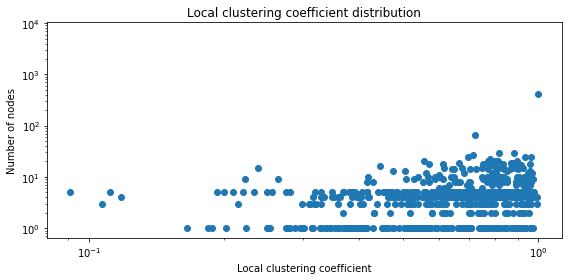

In [152]:
x = np.unique([item for item in list(clustering.values())])

y = []
counter=0
for sz in x:
    for item in list(clustering.values()):
        if item == sz:
            counter+=1
    y.append(counter)
    counter = 0
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Local clustering coefficient')
axes.set_ylabel('Number of nodes')
plt.title('Local clustering coefficient distribution')

save_fig('Local clustering coefficient distribution')

Saving figure ECDF Local clustering coefficient distribution


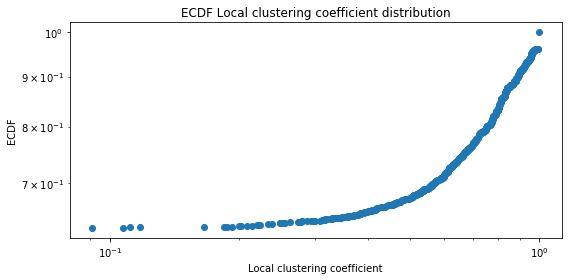

In [153]:
ecdf = ECDF(list(clustering.values()))
x = np.unique(list(clustering.values()))
y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Local clustering coefficient')
axes.set_ylabel('ECDF')
plt.title('ECDF Local clustering coefficient distribution')

save_fig('ECDF Local clustering coefficient distribution')

# Assortativity

In [154]:
degree_assortativity = nx.degree_assortativity_coefficient(first_graph)
df_metrics_values_rows.append(("Degree assortativity",degree_assortativity))

In [155]:
print("Degree assortativity:{}".format(degree_assortativity))

Degree assortativity:0.5184301951962018


In [156]:
nodes_attributes = []
for n in first_graph.nodes().values():
    nodes_attributes = list(n.keys())
    break

In [157]:
assortativity_coefficients = []
for idx, attr in enumerate(nodes_attributes):
    print('{}/{}'.format(idx,len(nodes_attributes)))
    clear_output(wait=True)
    assortativity_coefficients.append((attr,nx.attribute_assortativity_coefficient(first_graph,attr)))
np.save('analysis/negative/assortativity_coefficients.npy',assortativity_coefficients)

237/238


In [158]:
assortativity_coefficients

[('halo beauty', 0.6359679520342703),
 ('sally hansen', 0.19487292499393177),
 ('inglot cosmetics', 0.0838042081732309),
 ('Sona Gasparian', 0.5141204047286146),
 ('candy girl', -0.0021322635376455333),
 ('nyc new york color', 0.07188506651391126),
 ('Katy', 0.7931671942039581),
 ('doll 10', -0.00041332915261219685),
 ('la girl', 0.12134164303145512),
 ('clarins', -0.000511632279943298),
 ('rouge bunny rouge', -0.00041332915261219685),
 ('PatrickStarrr', 0.8962221374676492),
 ('pet', 0.07611732816809924),
 ('Summer Mckeen', 0.9339848190974077),
 ('James Charles', 0.9449436199235242),
 ('KathleenLights', 0.8326281711367947),
 ('danielle rae', 0.7468312975041697),
 ('Teni Panosian', 0.5938862446389974),
 ('anastasia beverly hills', 0.6173998393181978),
 ('neutrogena', 0.12071989056105548),
 ('everyday minerals', 0.08356620417725945),
 ('MonicaStyle Muse', 0.6921323933706598),
 ('sol body', -0.000568314770577053),
 ('Nabela Noor', 0.9540962744686675),
 ('lifestyle', 0.7500732543101548),
 

In [159]:
assortativity_min = min(assortativity_coefficients, key=lambda x: x[1])
assortativity_max = max(assortativity_coefficients, key=lambda x: x[1])
nan_assortativity_values = [item for item in assortativity_coefficients if math.isnan(item[1])]
np.save('analysis/negative/nan_assortativity_values.npy',nan_assortativity_values)
df_metrics_values_rows.append(("Minimum assortativity cofficient",assortativity_min))
df_metrics_values_rows.append(("Maximum assortativity cofficient",assortativity_max))
df_metrics_values_rows.append(("Number of NaN assortativity values",len(nan_assortativity_values)))
print('Minimum assortativity cofficient:\t\t{}'.format(assortativity_min))
print('Maximum assortativity cofficient:\t\t{}'.format(assortativity_max))
print('NaN assortativity values:\t\t{}\n{}'.format(len(nan_assortativity_values),nan_assortativity_values))

Minimum assortativity cofficient:		('candy girl', -0.0021322635376455333)
Maximum assortativity cofficient:		('itsjudytime', 0.9772235766208415)
NaN assortativity values:		0
[]


## Assortatività nella giant component

In [160]:
print("GIANT COMPONENT")
giant_degree_assortativity = nx.degree_assortativity_coefficient(giant_component)
df_giant_metrics_values_rows.append(("Degree assortativity",giant_degree_assortativity))
print("Degree assortativity:{}".format(giant_degree_assortativity))
giant_nodes_attributes = []
for n in giant_component.nodes().values():
    giant_nodes_attributes = list(n.keys())
    break
giant_assortativity_coefficients = []
for idx, attr in enumerate(giant_nodes_attributes):
    print('{}/{}'.format(idx,len(giant_nodes_attributes)))
    clear_output(wait=True)
    giant_assortativity_coefficients.append((attr,nx.attribute_assortativity_coefficient(giant_component,attr)))
np.save('analysis/negative/giant_assortativity_coefficients.npy',giant_assortativity_coefficients)
giant_assortativity_min = min(giant_assortativity_coefficients, key=lambda x: x[1])
giant_assortativity_max = max(giant_assortativity_coefficients, key=lambda x: x[1])
giant_nan_assortativity_values = [item for item in giant_assortativity_coefficients if math.isnan(item[1])]
df_giant_metrics_values_rows.append(("Minimum assortativity cofficient",giant_assortativity_min))
df_giant_metrics_values_rows.append(("Maximum assortativity cofficient",giant_assortativity_max))
df_giant_metrics_values_rows.append(("Number of NaN assortativity values",len(giant_nan_assortativity_values)))
print('Minimum assortativity cofficient:\t\t{}'.format(giant_assortativity_min))
print('Maximum assortativity cofficient:\t\t{}'.format(giant_assortativity_max))
print('NaN assortativity values:\t\t{}\n{}'.format(len(giant_nan_assortativity_values),giant_nan_assortativity_values))

Minimum assortativity cofficient:		('bobbi brown', -0.0026468039257244117)
Maximum assortativity cofficient:		('Bretman Rock', 0.9921030817441953)
NaN assortativity values:		50
[('doll 10', nan), ('rouge bunny rouge', nan), ('sol body', nan), ('rhythm_and_blues', nan), ('hard candy', nan), ('military', nan), ('coppertone', nan), ('chantecaille', nan), ('princess pat', nan), ('performing_arts', nan), ('chi chi cosmetics', nan), ('ilia', nan), ('linda hallberg', nan), ('no. 7', nan), ('burberry', nan), ('tropic skincare', nan), ('television_program', nan), ('soul_music', nan), ('lime crime', nan), ('copycat beauty', nan), ('trixie cosmetics', nan), ('nivea', nan), ('jo malone london', nan), ('fairy girl', nan), ('cheap', nan), ('mineral fusion', nan), ('gosh', nan), ('almay', nan), ('parachute', nan), ('korres', nan), ('bh cosmetics', nan), ('role-playing_video_game', nan), ('thebalm', nan), ("kiehl's", nan), ('hip_hop_music', nan), ("burt's bees", nan), ('cyo cosmetics', nan), ('max fac

# Community detection

In [161]:
partition_louvain = community_louvain.best_partition(first_graph)
np.save('analysis/negative/partition_louvain.npy',partition_louvain)
number_of_communities = len(set(partition_louvain.values()))
print('Number of communities: ', number_of_communities)
df_metrics_values_rows.append(("Number of communities",number_of_communities))
print(Counter(partition_louvain.values()))

Number of communities:  6627
Counter({46: 183, 32: 179, 29: 142, 0: 140, 10: 136, 31: 129, 2: 127, 36: 124, 27: 118, 167: 118, 85: 116, 1: 112, 109: 105, 65: 104, 25: 103, 235: 102, 14: 101, 125: 99, 118: 93, 61: 88, 17: 84, 178: 84, 143: 81, 86: 78, 179: 78, 38: 77, 70: 77, 92: 74, 108: 73, 13: 72, 84: 65, 59: 59, 168: 58, 45: 54, 64: 52, 93: 52, 282: 51, 356: 47, 155: 44, 9: 39, 388: 31, 157: 30, 634: 27, 998: 18, 60: 16, 124: 10, 11: 5, 22: 5, 44: 5, 62: 5, 90: 5, 134: 5, 144: 5, 254: 5, 258: 5, 301: 5, 362: 5, 369: 5, 393: 5, 544: 5, 555: 5, 564: 5, 696: 5, 740: 5, 859: 5, 1022: 5, 1029: 5, 1301: 5, 1326: 5, 1431: 5, 1451: 5, 1453: 5, 1691: 5, 1847: 5, 2252: 5, 2370: 5, 2437: 5, 2855: 5, 2893: 5, 3177: 5, 3699: 5, 836: 4, 1087: 4, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 12: 1, 15: 1, 16: 1, 18: 1, 19: 1, 20: 1, 21: 1, 23: 1, 24: 1, 26: 1, 28: 1, 30: 1, 33: 1, 34: 1, 35: 1, 37: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57

In [162]:
modularity = community.modularity(partition_louvain,first_graph)
df_metrics_values_rows.append(("Modularity",modularity))
print('Modularity:', modularity)

Modularity: 0.9413733751111363


## Community detection nella giant component

In [163]:
giant_partition_louvain = community_louvain.best_partition(giant_component)
np.save('analysis/negative/giant_partition_louvain.npy',giant_partition_louvain)
giant_number_of_communities = len(set(giant_partition_louvain.values()))
print('Number of communities: ', giant_number_of_communities)
df_giant_metrics_values_rows.append(("Number of communities",giant_number_of_communities))
print(Counter(giant_partition_louvain.values()))

Number of communities:  39
Counter({15: 183, 1: 178, 4: 175, 17: 153, 2: 152, 13: 147, 11: 124, 20: 118, 33: 116, 25: 115, 10: 113, 12: 112, 3: 105, 27: 102, 31: 102, 14: 97, 38: 95, 22: 93, 0: 91, 7: 88, 35: 81, 8: 78, 19: 78, 18: 77, 6: 74, 28: 74, 5: 72, 29: 60, 9: 59, 23: 58, 26: 54, 16: 52, 21: 52, 32: 51, 30: 40, 34: 39, 24: 35, 36: 31, 37: 16})


In [164]:
giant_modularity = community.modularity(giant_partition_louvain,giant_component)
df_giant_metrics_values_rows.append(("Modularity",giant_modularity))
print('Modularity:', giant_modularity)

Modularity: 0.9347350902061653


# Saving lines

In [165]:
df_metrics_values = pd.DataFrame(df_metrics_values_rows, columns=['Metric name','Value'])
df_metrics_values.to_csv('analysis/negative/df_metrics_values.csv')

In [166]:
df_metrics_values

,Metric name,Value
0,Number of nodes,10577
1,Number of links,70191
2,Average degree,13.2724
3,Density,0.00125495
4,Degree standard deviation,22.2107
5,Median degree,0
6,Minimum degree,0
7,Maximum degree,213
8,Percentile 99,91
9,Number of hubs,110


In [167]:
giant_df_metrics_values = pd.DataFrame(df_giant_metrics_values_rows, columns=['Metric name','Value'])
giant_df_metrics_values.to_csv('analysis/negative/giant_df_metrics_values.csv')
giant_df_metrics_values

,Metric name,Value
0,Average degree,36.2763
1,Density,0.0102504
2,Degree standard deviation,22.9556
3,Median degree,33
4,Minimum degree,1
5,Maximum degree,213
6,Degree assortativity,0.503976
7,Minimum assortativity cofficient,"(bobbi brown, -0.0026468039257244117)"
8,Maximum assortativity cofficient,"(Bretman Rock, 0.9921030817441953)"
9,Number of NaN assortativity values,50
